In [74]:
import torch
from torchvision import transforms
from torchvision import datasets
from torch.utils.data import DataLoader
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import glob
import pandas as pd
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder


In [75]:
path = 'C:/Users/89344/Desktop/人工神经网络/vowel'
file_name = glob.glob(path+'/*')
data = []
for i in file_name:
    data.append(pd.read_table(i, sep = '\t', header = 0))
train_data = data[1]
test_data = data[0]
train_data_string =  train_data.loc[0]
train_data.drop(labels=[0,1],inplace = True)
train_data.reset_index(drop = True,inplace = True)
test_data_string =  test_data.loc[0]
test_data.drop(labels=[0,1],inplace = True)
test_data.reset_index(drop = True,inplace = True)
#lst = ['x.1']
lst = ['x.1', 'x.2', 'x.3', 'x.4', 'x.5', 'x.6', 'x.7','x.8', 'x.9', 'x.10']
train_x = np.array(train_data[lst]).astype(float)
train_y = np.array(train_data['y']).astype(float).reshape(-1,1)
values = array(train_y)
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

# train_x = np.array([[0,0],[0,1],[1,0],[1,1]])
# train_y = np.array([[0.0],[1.0],[1.0],[0.0]])
train_x_tensor = torch.from_numpy(train_x.astype(np.float32))
train_y_tensor = torch.from_numpy(onehot_encoded.astype(np.float32))
#print(train_y_tensor.shape)

D:\Anaconda\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [76]:
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = torch.nn.Linear(10,20)
        self.fc2 = torch.nn.Linear(20,11)
        self.sigmoid = torch.nn.Sigmoid()
    
    def forward(self, x):
        y_pred = self.sigmoid(self.fc1(x))
        y_pred = self.sigmoid(self.fc2(y_pred))
#         print(x.shape)
        return y_pred
    


In [77]:
model = Net()
criterion = torch.nn.CrossEntropyLoss(reduction = 'mean')
optimizer = optim.Adam(model.parameters(), lr = 0.1)
epoch_lst = []
loss_item = []
def train(train_num,inputs,target):
    epsilon = 0.001
    for epoch in range(train_num):
        optimizer.zero_grad()
        #forward

        outputs = model(inputs)
        loss = criterion(outputs, target)
        print(loss.item())
        #backward
        loss.backward()
        optimizer.step()
        if(epoch % 500 == 499):
            print(epoch,loss.item())
            epoch_lst.append(epoch)
            loss_item.append(loss.item())
        if loss < epsilon:
            print(epoch)
            loss = epsilon
            torch.save(model.state_dict(),'./model.pt')
            print("loss < epsilon")
            break;


2.4007248878479004
2.3719115257263184
2.33005952835083
2.2786636352539062
2.2282521724700928
2.1845593452453613
2.1469016075134277
2.1135737895965576
2.084408760070801
2.0588607788085938
2.0359365940093994
2.015681028366089
1.9980835914611816
1.9826940298080444
1.9689754247665405
1.956529140472412
1.945170521736145
1.935106873512268
1.9263280630111694
1.9183176755905151
1.9104143381118774
1.902330994606018
1.8944603204727173
1.8871359825134277
1.8802570104599
1.8736687898635864
1.8673038482666016
1.8613613843917847
1.8559906482696533
1.8509589433670044
1.846144199371338
1.8416367769241333
1.8374651670455933
1.8335540294647217
1.8298145532608032
1.826141595840454
1.8225152492523193
1.819015383720398
1.815656065940857
1.8123371601104736
1.809061050415039
1.805907130241394
1.8028484582901
1.7998327016830444
1.796889305114746
1.794064998626709
1.791380524635315
1.7887643575668335
1.7861535549163818
1.7835692167282104
1.78107488155365
1.7786568403244019
1.7762434482574463
1.773824691772461


1.5855604410171509
1.5855188369750977
1.5854774713516235
1.5854359865188599
1.5853943824768066
1.5853519439697266
1.5853086709976196
1.5852627754211426
1.5852124691009521
1.5851550102233887
1.5850915908813477
1.5850274562835693
1.5849616527557373
1.5848857164382935
1.584806203842163
1.5847489833831787
1.5847082138061523
1.5846571922302246
1.5846035480499268
1.584544062614441
1.5844913721084595
1.5844393968582153
1.5843926668167114
1.584338665008545
1.5842869281768799
1.584236741065979
1.584191083908081
1.5841448307037354
1.5840994119644165
1.5840535163879395
1.5840084552764893
1.5839654207229614
1.5839225053787231
1.5838794708251953
1.583836317062378
1.5837934017181396
1.5837503671646118
1.5837087631225586
1.5836681127548218
1.5836275815963745
1.5835862159729004
1.5835448503494263
1.5835036039352417
1.5834628343582153
1.5834225416183472
1.5833834409713745
1.5833438634872437
1.5833051204681396
1.5832666158676147
1.5832289457321167
1.583191990852356
1.5831557512283325
499 1.5831557512283

1.5762848854064941
1.5762794017791748
1.576273798942566
1.5762685537338257
1.5762630701065063
1.5762577056884766
1.5762522220611572
1.5762470960617065
1.5762417316436768
1.576236367225647
1.5762311220169067
1.576225996017456
1.5762208700180054
1.5762157440185547
1.576210618019104
1.5762053728103638
1.5762004852294922
1.576195240020752
1.5761901140213013
1.5761849880218506
1.5761798620224
1.5761748552322388
1.576169729232788
1.5761644840240479
1.5761593580245972
1.576154112815857
1.5761489868164062
1.576143503189087
1.5761383771896362
1.5761327743530273
1.5761271715164185
1.57612144947052
1.576115369796753
1.5761091709136963
1.5761027336120605
1.5760959386825562
1.5760884284973145
1.576080560684204
1.5760719776153564
1.5760626792907715
1.5760530233383179
1.5760427713394165
1.5760319232940674
1.5760211944580078
1.5760102272033691
1.5759996175765991
1.5759892463684082
1.575979232788086
1.5759698152542114
1.5759609937667847
1.5759527683258057
1.5759453773498535
1.5759379863739014
1.5759313

1.5728213787078857
1.5728205442428589
1.572819709777832
1.5728187561035156
1.5728179216384888
1.5728169679641724
1.572816252708435
1.5728154182434082
1.5728144645690918
1.5728135108947754
1.5728129148483276
1.5728119611740112
1.5728110074996948
1.5728100538253784
1.5728093385696411
1.5728085041046143
1.5728075504302979
1.5728065967559814
1.5728060007095337
1.5728050470352173
1.57280433177948
1.5728036165237427
1.5728025436401367
1.5728017091751099
1.5728009939193726
1.5728001594543457
1.5727992057800293
1.572798490524292
1.5727976560592651
1.5727969408035278
1.5727959871292114
1.572795033454895
1.5727943181991577
1.5727938413619995
1.5727927684783936
1.5727920532226562
1.5727910995483398
1.5727903842926025
1.5727897882461548
1.5727888345718384
1.5727880001068115
1.5727871656417847
1.5727863311767578
1.57278573513031
1.5727849006652832
1.5727840662002563
1.5727832317352295
1.5727825164794922
1.5727818012237549
1.572780966758728
1.5727800130844116
1.5727792978286743
1.5727787017822266
1.

1.572563648223877
1.5725631713867188
1.5725629329681396
1.5725624561309814
1.5725620985031128
1.5725616216659546
1.572561502456665
1.5725611448287964
1.5725607872009277
1.5725605487823486
1.57256019115448
1999 1.57256019115448
1.5725598335266113
1.5725595951080322
1.572559118270874
1.572558879852295
1.5725585222244263
1.572558045387268
1.572557806968689
1.5725574493408203
1.5725572109222412
1.5725568532943726
1.572556495666504
1.5725560188293457
1.5725557804107666
1.572555422782898
1.5725550651550293
1.5725547075271606
1.572554588317871
1.5725539922714233
1.5725538730621338
1.5725535154342651
1.5725531578063965
1.572553038597107
1.5725524425506592
1.57255220413208
1.5725518465042114
1.5725516080856323
1.5725512504577637
1.5725507736206055
1.5725505352020264
1.5725501775741577
1.572549819946289
1.572549819946289
1.5725493431091309
1.5725489854812622
1.5725486278533936
1.572548270225525
1.5725480318069458
1.5725475549697876
1.5725473165512085
1.5725470781326294
1.5725466012954712
1.57254

1.5724520683288574
1.5724519491195679
1.5724518299102783
1.5724517107009888
1.5724513530731201
1.572451114654541
1.5724509954452515
1.572450876235962
1.5724506378173828
1.5724505186080933
1.5724503993988037
1.5724501609802246
1.5724501609802246
1.5724496841430664
1.5724496841430664
1.5724493265151978
1.5724493265151978
1.5724492073059082
1.572448968887329
1.57244873046875
1.572448492050171
1.5724482536315918
1.5724481344223022
1.5724478960037231
1.5724477767944336
1.572447657585144
1.5724472999572754
1.5724472999572754
1.5724469423294067
1.5724469423294067
1.5724468231201172
1.572446584701538
1.5724462270736694
1.5724462270736694
1.5724461078643799
1.5724459886550903
1.5724457502365112
1.5724455118179321
1.572445273399353
1.5724451541900635
1.572445034980774
1.5724447965621948
1.5724446773529053
1.5724444389343262
1.5724443197250366
1.5724440813064575
1.572443962097168
1.5724436044692993
1.5724434852600098
1.5724433660507202
1.5724432468414307
1.5724431276321411
1.572442889213562
1.572

1.5723686218261719
1.5723686218261719
1.5723685026168823
1.5723682641983032
1.5723682641983032
1.5723682641983032
1.5723680257797241
1.5723680257797241
1.5723679065704346
1.5723679065704346
1.5723676681518555
1.572367548942566
1.572367548942566
1.5723674297332764
1.5723671913146973
1.5723671913146973
1.5723670721054077
1.5723670721054077
1.5723670721054077
1.5723669528961182
1.572366714477539
1.572366714477539
1.5723665952682495
1.5723665952682495
1.57236647605896
1.57236647605896
1.5723662376403809
1.5723662376403809
1.5723662376403809
1.5723661184310913
1.5723659992218018
1.5723659992218018
1.5723657608032227
1.572365641593933
1.572365641593933
1.572365403175354
1.572365403175354
1.572365403175354
1.572365403175354
1.572365164756775
1.572365164756775
1.5723648071289062
1.5723648071289062
1.5723648071289062
1.5723646879196167
1.5723645687103271
1.5723644495010376
1.5723644495010376
1.5723644495010376
1.5723644495010376
1.5723642110824585
1.572364091873169
1.572364091873169
1.572364091

1.5723364353179932
1.5723363161087036
1.5723363161087036
1.572336196899414
1.572336196899414
1.572336196899414
1.572336196899414
1.572336196899414
1.572335958480835
1.572335958480835
1.5723357200622559
1.5723357200622559
1.5723357200622559
1.5723357200622559
1.5723357200622559
1.5723357200622559
1.5723353624343872
1.5723353624343872
1.5723353624343872
1.5723353624343872
1.5723353624343872
1.5723353624343872
1.5723352432250977
1.5723352432250977
1.5723352432250977
1.5723352432250977
1.5723350048065186
1.572334885597229
1.572334885597229
1.5723347663879395
1.5723347663879395
1.57233464717865
1.57233464717865
1.57233464717865
1.5723344087600708
1.5723344087600708
1.5723344087600708
1.5723344087600708
1.5723342895507812
1.5723340511322021
1.5723340511322021
1.5723340511322021
1.5723339319229126
1.5723339319229126
1.5723339319229126
1.5723339319229126
1.572333812713623
1.5723336935043335
1.5723336935043335
1.572333574295044
1.5723334550857544
1.5723334550857544
1.5723334550857544
1.57233345

1.5723145008087158
1.5723143815994263
1.5723142623901367
1.5723142623901367
1.5723142623901367
1.5723141431808472
1.5723141431808472
1.5723141431808472
1.572313904762268
1.572313904762268
1.572313904762268
1.572313904762268
1.5723137855529785
1.5723137855529785
1.572313666343689
1.572313666343689
1.572313666343689
1.572313666343689
1.572313666343689
1.572313666343689
1.572313666343689
1.5723135471343994
1.5723134279251099
1.5723134279251099
1.5723134279251099
1.5723134279251099
1.5723134279251099
1.5723134279251099
1.5723133087158203
1.5723133087158203
1.5723133087158203
3999 1.5723133087158203
1.5723130702972412
1.5723130702972412
1.5723130702972412
1.5723130702972412
1.5723130702972412
1.5723129510879517
1.572312831878662
1.572312831878662
1.572312831878662
1.572312831878662
1.572312831878662
1.5723127126693726
1.5723127126693726
1.5723127126693726
1.5723127126693726
1.5723127126693726
1.5723127126693726
1.5723127126693726
1.5723124742507935
1.572312355041504
1.572312355041504
1.5723

1.5722986459732056
1.572298526763916
1.572298526763916
1.572298526763916
1.5722984075546265
1.5722984075546265
1.5722984075546265
1.5722984075546265
1.5722984075546265
1.572298288345337
1.572298288345337
1.572298288345337
1.5722981691360474
1.5722981691360474
1.5722981691360474
1.5722981691360474
1.5722981691360474
1.5722981691360474
1.5722981691360474
1.5722980499267578
1.5722980499267578
1.5722980499267578
1.5722978115081787
1.5722978115081787
1.5722978115081787
1.5722978115081787
1.5722978115081787
1.5722978115081787
1.5722978115081787
1.5722978115081787
1.5722978115081787
1.5722978115081787
1.5722978115081787
1.5722975730895996
1.5722975730895996
1.5722975730895996
1.5722975730895996
1.5722975730895996
1.5722975730895996
1.5722975730895996
1.5722975730895996
1.57229745388031
1.57229745388031
1.57229745388031
1.57229745388031
1.57229745388031
1.57229745388031
1.5722973346710205
1.5722973346710205
1.572297215461731
1.572297215461731
1.572297215461731
1.572297215461731
1.5722969770431

1.5722873210906982
1.5722873210906982
1.5722873210906982
1.5722873210906982
1.5722872018814087
1.5722872018814087
1.5722872018814087
1.5722872018814087
1.5722872018814087
1.5722872018814087
1.5722872018814087
1.5722872018814087
1.5722872018814087
1.5722872018814087
1.5722872018814087
1.5722872018814087
1.5722872018814087
1.5722872018814087
1.5722870826721191
1.5722870826721191
1.5722870826721191
1.5722870826721191
1.5722869634628296
1.5722869634628296
1.5722869634628296
1.5722869634628296
1.57228684425354
1.57228684425354
1.57228684425354
1.57228684425354
1.57228684425354
1.572286605834961
1.572286605834961
1.572286605834961
1.572286605834961
1.572286605834961
1.572286605834961
1.572286605834961
1.572286605834961
1.572286605834961
1.572286605834961
1.572286605834961
1.5722864866256714
1.5722864866256714
1.5722864866256714
1.5722864866256714
1.5722864866256714
1.5722864866256714
1.5722864866256714
1.5722864866256714
1.5722864866256714
1.5722864866256714
1.5722864866256714
1.572286486625

1.5722765922546387
1.5722765922546387
1.5722765922546387
1.5722765922546387
1.5722765922546387
1.5722764730453491
1.5722764730453491
1.5722764730453491
1.5722764730453491
1.5722764730453491
1.5722764730453491
1.5722764730453491
1.5722764730453491
1.5722764730453491
1.5722764730453491
1.5722764730453491
1.5722764730453491
1.5722764730453491
1.5722764730453491
1.5722764730453491
1.5722764730453491
1.5722764730453491
1.5722764730453491
1.5722764730453491
1.5722764730453491
1.5722764730453491
1.5722764730453491
1.57227623462677
1.57227623462677
1.57227623462677
1.57227623462677
1.57227623462677
1.57227623462677
1.57227623462677
1.57227623462677
1.57227623462677
1.57227623462677
1.57227623462677
1.57227623462677
1.57227623462677
1.57227623462677
1.57227623462677
1.572275996208191
1.572275996208191
1.572275996208191
1.572275996208191
1.572275996208191
1.572275996208191
1.572275996208191
1.572275996208191
1.572275996208191
1.572275996208191
1.572275996208191
1.5722758769989014
1.5722758769989

1.5722695589065552
1.5722695589065552
1.5722695589065552
1.5722695589065552
1.572269320487976
1.5722692012786865
1.5722692012786865
1.5722692012786865
1.5722692012786865
1.5722692012786865
1.5722692012786865
1.5722692012786865
1.5722692012786865
1.5722692012786865
1.5722692012786865
1.5722692012786865
1.5722692012786865
1.5722692012786865
1.5722692012786865
1.5722692012786865
1.5722692012786865
1.5722692012786865
1.5722692012786865
1.5722692012786865
1.5722692012786865
1.5722692012786865
1.5722692012786865
1.5722692012786865
1.5722692012786865
1.5722692012786865
1.572269082069397
1.572269082069397
1.572269082069397
1.572269082069397
1.572269082069397
1.572269082069397
1.572269082069397
1.572269082069397
1.572269082069397
1.572269082069397
1.572269082069397
1.572269082069397
1.572269082069397
1.572269082069397
1.572269082069397
1.5722689628601074
1.5722689628601074
1.5722689628601074
1.5722689628601074
1.5722689628601074
1.5722689628601074
1.5722689628601074
1.5722689628601074
1.5722689

1.572264313697815
1.572264313697815
1.572264313697815
1.572264313697815
1.572264313697815
1.572264313697815
1.572264313697815
1.572264313697815
1.572264313697815
1.572264313697815
1.572264313697815
1.572264313697815
1.572264313697815
1.572264313697815
1.572264313697815
1.572264313697815
1.5722640752792358
1.5722640752792358
1.5722640752792358
1.5722640752792358
1.5722640752792358
1.5722640752792358
1.5722640752792358
1.5722640752792358
1.5722640752792358
1.5722640752792358
1.5722640752792358
1.5722640752792358
1.5722640752792358
1.5722640752792358
1.5722640752792358
1.5722640752792358
1.5722640752792358
1.5722640752792358
1.5722640752792358
1.5722640752792358
1.5722640752792358
1.5722640752792358
1.5722639560699463
1.5722639560699463
1.5722639560699463
1.5722639560699463
1.5722639560699463
1.5722639560699463
1.5722639560699463
1.5722639560699463
1.5722639560699463
1.5722639560699463
1.5722639560699463
1.5722639560699463
1.5722639560699463
1.5722639560699463
1.5722639560699463
1.5722639

1.5722618103027344
1.5722618103027344
1.5722616910934448
1.5722616910934448
1.5722616910934448
1.5722616910934448
1.5722616910934448
1.5722616910934448
1.5722616910934448
1.5722616910934448
1.5722616910934448
1.5722616910934448
1.5722616910934448
1.5722616910934448
1.5722616910934448
1.5722616910934448
1.5722616910934448
1.5722616910934448
1.5722616910934448
1.5722616910934448
1.5722616910934448
1.5722616910934448
1.5722616910934448
1.5722616910934448
1.5722616910934448
1.5722616910934448
1.5722616910934448
1.5722616910934448
1.5722616910934448
1.5722616910934448
1.5722616910934448
1.5722616910934448
1.5722616910934448
1.5722616910934448
1.5722615718841553
1.5722615718841553
1.5722615718841553
1.5722615718841553
1.5722615718841553
1.5722615718841553
1.5722615718841553
1.5722615718841553
1.5722615718841553
1.5722615718841553
1.5722615718841553
1.5722615718841553
1.5722615718841553
1.5722615718841553
1.5722615718841553
1.5722615718841553
1.5722615718841553
1.5722615718841553
1.5722615718

1.5722599029541016
1.5722599029541016
1.5722599029541016
1.5722599029541016
1.5722599029541016
1.5722599029541016
1.5722599029541016
1.5722599029541016
1.5722599029541016
1.5722599029541016
1.5722599029541016
1.5722599029541016
1.5722599029541016
1.5722599029541016
1.5722599029541016
1.5722599029541016
1.5722599029541016
1.572259783744812
1.572259783744812
1.572259783744812
1.572259783744812
1.572259783744812
1.572259783744812
1.572259783744812
1.572259783744812
1.572259783744812
1.572259783744812
1.572259783744812
1.572259783744812
1.572259783744812
1.572259783744812
1.572259783744812
1.572259783744812
1.572259545326233
1.572259545326233
1.572259545326233
1.572259545326233
1.572259545326233
1.572259545326233
1.572259545326233
1.572259545326233
1.572259545326233
1.572259545326233
1.572259545326233
1.572259545326233
1.572259545326233
1.572259545326233
1.572259545326233
1.572259545326233
1.572259545326233
1.572259545326233
1.572259545326233
1.572259545326233
1.572259545326233
1.572259545

1.5722582340240479
1.5722582340240479
1.5722582340240479
1.5722582340240479
1.5722582340240479
1.5722582340240479
1.5722582340240479
1.5722582340240479
1.5722582340240479
1.5722582340240479
1.5722582340240479
1.5722582340240479
1.5722582340240479
1.5722582340240479
1.5722582340240479
1.5722582340240479
1.5722582340240479
1.5722582340240479
1.5722582340240479
1.5722582340240479
1.5722582340240479
1.5722582340240479
1.5722582340240479
1.5722582340240479
1.5722582340240479
1.5722582340240479
1.5722582340240479
1.5722582340240479
1.5722582340240479
1.5722582340240479
1.5722582340240479
1.5722582340240479
1.5722582340240479
1.5722582340240479
1.5722582340240479
1.5722582340240479
1.5722582340240479
1.5722582340240479
1.5722582340240479
1.5722582340240479
1.5722582340240479
1.5722582340240479
1.5722582340240479
1.5722582340240479
1.5722582340240479
1.5722582340240479
1.5722581148147583
1.5722581148147583
1.5722581148147583
1.5722581148147583
1.5722581148147583
1.5722581148147583
1.5722581148

1.5722569227218628
1.5722569227218628
1.5722569227218628
1.5722569227218628
1.5722569227218628
1.5722569227218628
1.5722569227218628
1.5722569227218628
1.5722569227218628
1.5722569227218628
1.5722569227218628
1.5722569227218628
1.5722569227218628
1.5722569227218628
1.5722569227218628
1.5722569227218628
1.5722569227218628
1.5722569227218628
1.5722569227218628
1.5722569227218628
1.5722569227218628
1.5722569227218628
1.5722569227218628
1.5722569227218628
1.5722569227218628
1.5722569227218628
1.5722569227218628
1.5722569227218628
1.5722569227218628
1.5722569227218628
1.5722569227218628
1.5722569227218628
1.5722569227218628
1.5722569227218628
1.5722569227218628
1.5722569227218628
1.5722569227218628
1.5722569227218628
1.5722569227218628
1.5722569227218628
1.5722569227218628
1.5722569227218628
1.5722569227218628
1.5722568035125732
1.5722568035125732
1.5722568035125732
1.5722568035125732
1.5722568035125732
1.5722568035125732
1.5722568035125732
1.5722568035125732
1.5722568035125732
1.5722566843

1.572256088256836
1.572256088256836
1.572256088256836
1.572256088256836
1.572256088256836
1.572256088256836
1.572256088256836
1.572256088256836
1.572256088256836
1.572256088256836
1.572256088256836
1.572256088256836
1.572256088256836
1.572256088256836
1.572256088256836
1.572256088256836
1.572256088256836
1.572256088256836
1.572256088256836
1.572256088256836
1.572256088256836
1.572256088256836
1.572256088256836
1.572256088256836
1.572256088256836
1.572256088256836
1.572256088256836
1.572256088256836
1.572256088256836
1.572256088256836
1.572256088256836
1.572256088256836
1.572256088256836
1.572256088256836
1.572256088256836
1.572256088256836
1.572256088256836
1.572256088256836
1.572256088256836
1.572256088256836
1.572256088256836
1.572256088256836
1.572256088256836
1.572256088256836
1.572256088256836
1.572256088256836
1.572256088256836
1.572256088256836
1.572256088256836
1.572256088256836
1.572256088256836
1.572256088256836
1.572256088256836
1.572256088256836
1.572256088256836
1.57225608

1.572255253791809
1.572255253791809
1.572255253791809
9499 1.572255253791809
1.572255253791809
1.572255253791809
1.572255253791809
1.572255253791809
1.572255253791809
1.572255253791809
1.572255253791809
1.572255253791809
1.572255253791809
1.572255253791809
1.572255253791809
1.572255253791809
1.572255253791809
1.572255253791809
1.572255253791809
1.572255253791809
1.572255253791809
1.572255253791809
1.572255253791809
1.572255253791809
1.572255253791809
1.572255253791809
1.572255253791809
1.572255253791809
1.572255253791809
1.572255253791809
1.572255253791809
1.572255253791809
1.572255253791809
1.572255253791809
1.572255253791809
1.572255253791809
1.572255253791809
1.572255253791809
1.572255253791809
1.572255253791809
1.572255253791809
1.572255253791809
1.572255253791809
1.572255253791809
1.572255253791809
1.572255253791809
1.572255253791809
1.572255253791809
1.572255253791809
1.572255253791809
1.572255253791809
1.572255253791809
1.572255253791809
1.572255253791809
1.572255253791809
1.572

1.5722546577453613
1.5722546577453613
1.5722546577453613
1.5722546577453613
1.5722546577453613
1.5722546577453613
1.5722546577453613
1.5722546577453613
1.5722546577453613
1.5722546577453613
1.5722546577453613
1.5722546577453613
1.5722546577453613
1.5722546577453613
1.5722546577453613
1.5722546577453613
1.5722546577453613
1.5722546577453613
1.5722546577453613
1.5722546577453613
1.5722546577453613
1.5722546577453613
1.5722546577453613
1.5722546577453613
1.5722546577453613
1.5722546577453613
1.5722546577453613
1.5722546577453613
1.5722546577453613
1.5722546577453613
1.5722546577453613
1.5722546577453613
1.5722546577453613
1.5722546577453613
1.5722546577453613
1.5722546577453613
1.5722546577453613
1.5722546577453613
1.5722546577453613
1.5722546577453613
1.5722546577453613
1.5722546577453613
1.5722546577453613
1.5722546577453613
1.5722546577453613
1.5722546577453613
1.5722546577453613
1.5722546577453613
1.5722546577453613
1.5722546577453613
1.5722546577453613
1.5722546577453613
1.5722546577

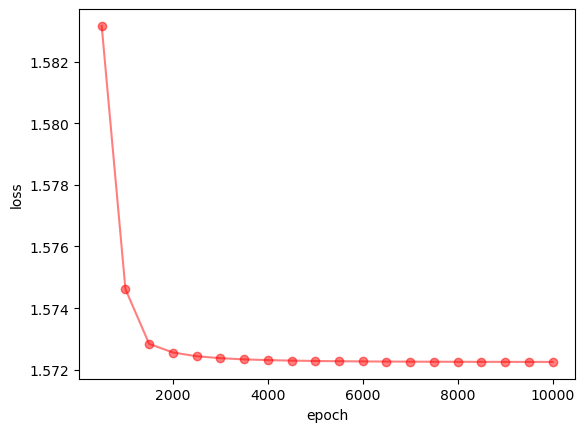

In [78]:
if __name__ == '__main__':
    train(10000,train_x_tensor, train_y_tensor)
    plt.plot(epoch_lst, loss_item,linestyle = "-",marker="o",color='r', alpha = 0.5)
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.show()